## Let's Import All necessery libraraies

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.cluster import KMeans
sns.set_style("darkgrid")

## Load data from csv file

In [24]:
def load_data(filename):
    ## Let's load the dataset
    if ".csv" not in filename:
        filename=filename+".csv"
    df1=pd.read_csv(filename,parse_dates=True,index_col=["Time"])
#     print(df1.head())
#     print(df1.tail())
    return df1

In [25]:
## As you can see all the values in our dataframe is string let's convert it into floating point value
def parse_columns(x):
    try:
        return np.float32(x)
    except:
        return np.float32(x.replace(",",""))

## Let's preprocess our data

In [26]:
def preprocess_data(df):
    df = df.replace(['-'],'0')
    for col in df.columns:
        df[col]=df[col].apply(lambda x : parse_columns(x))
    return df

## Plot the data

In [27]:
def plot_data(df):
    df.plot(figsize=(20,10))
    for col in df.columns:
       df[col].plot(figsize=(20,10),fontsize=13,color="green")
       plt.ylabel(col,fontsize=15)
       plt.xlabel("Time",fontsize=15)
       plt.show()

## Let's Use Inter Quantile Range Method In order to get Outlier

In [28]:
def detect_outlier_usingIQR(df1):
    plt.suptitle("Let's Detect Outlier using IQR Forest",fontsize=25)
    for col in df1.columns:
       iqr=df1[col].quantile(0.75)-df1[col].quantile(0.25)
       lower_limit=df1[col].quantile(0.25)-(iqr*1.5)
       upper_limit=df1[col].quantile(0.75)+(iqr*1.5)
       temp=df1[(df1[col] > upper_limit) | (df1[col] < lower_limit)][col]
       if len(temp)> 0:
          print(f"There are total {len(temp)} outliers in {col} columns")
          df1[col].plot(figsize=(20,10),fontsize=13,color="yellow")
          plt.scatter(x=temp.index,y=temp.values,s=50,c="red",alpha=1)
          plt.ylabel(col,fontsize=15)
          plt.xlabel("Time",fontsize=15)
          plt.show()
       else:
          print(f"There is no outlier in {col}\n")

## Let's Use Isolation Forest to detect Outlier

In [29]:
def detect_outlier_usingIsolation_forest(df1, i):
    outlier_fraction=0.05
    plt.suptitle("Let's Detect Outlier using Isolation Forest",fontsize=25)
    df1.to_csv(f"training/Well {i} with predictions.csv")
    for col in df1.columns:
        model=IsolationForest(contamination=outlier_fraction)
        model.fit(df1[col].values.reshape(-1,1))
        p=model.predict(df1[col].values.reshape(-1,1))
        temp=df1[p==-1][col]
        df10 =load_data(f"training/Well {i} with predictions.csv")
        df10[f"{col} anomaly"] = p
        df10.to_csv(f"training/Well {i} with predictions.csv")
    if len(temp)> 0:
        print(f"There are total {len(temp)} outliers in {col} columns")
        df1[col].plot(figsize=(20,10),fontsize=13,color="green")
        plt.scatter(x=temp.index,y=temp.values,s=50,c="red",alpha=1)
        plt.ylabel(col,fontsize=15)
        plt.xlabel("Time",fontsize=15)
        plt.show()
    else:
        print(f"There is no outlier in {col}\n")


## Let's use Kmeans Clustering to get outliers

In [30]:
def detect_outlier_usingKMeans(df1):
    outlier_fraction=0.05
    plt.suptitle("Let's Detect Outlier using Kmeans",fontsize=25)
    """ Function that calculates the distance between a point and centroid of a cluster, 
            returns the distances in pandas series"""
    for col in df1.columns:
      model=KMeans(n_clusters=1,random_state=100)
      model.fit(df1[col].values.reshape(-1,1))
      distance = []
      for i in range(0,len(df1)):
          Xa = np.array(df1[col].iloc[i])
          Xb = model.cluster_centers_[model.labels_[i]]
          distance.append(np.linalg.norm(Xa-Xb))
      return pd.Series(distance, index=df1.index)

There are total 200 outliers in VIBRATION columns


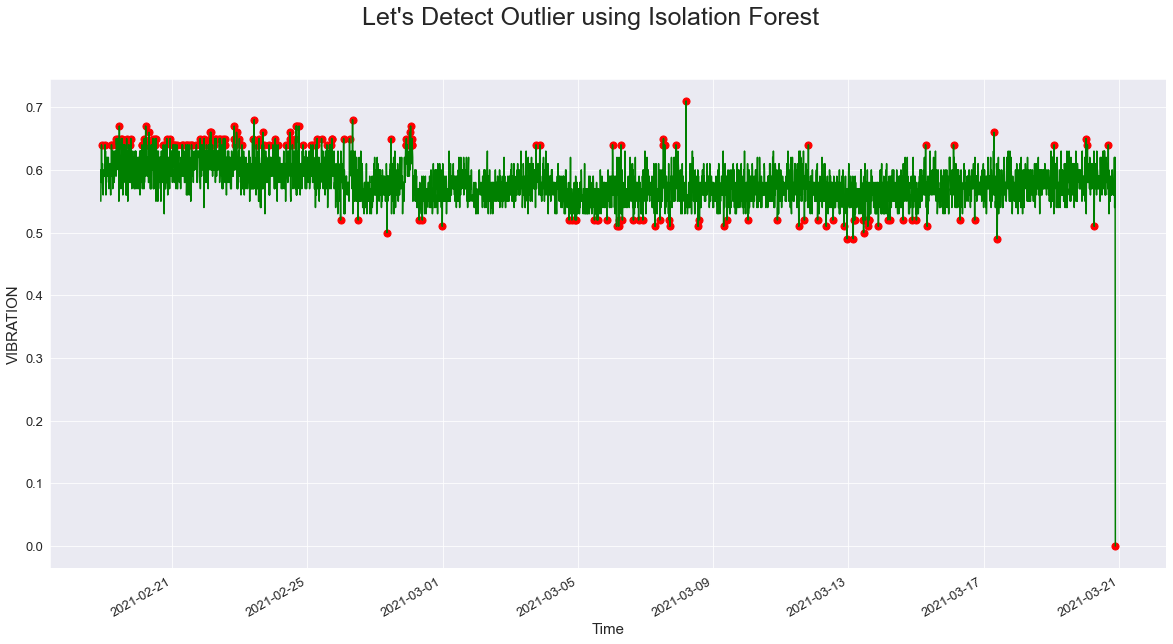

There are total 140 outliers in VIBRATION columns


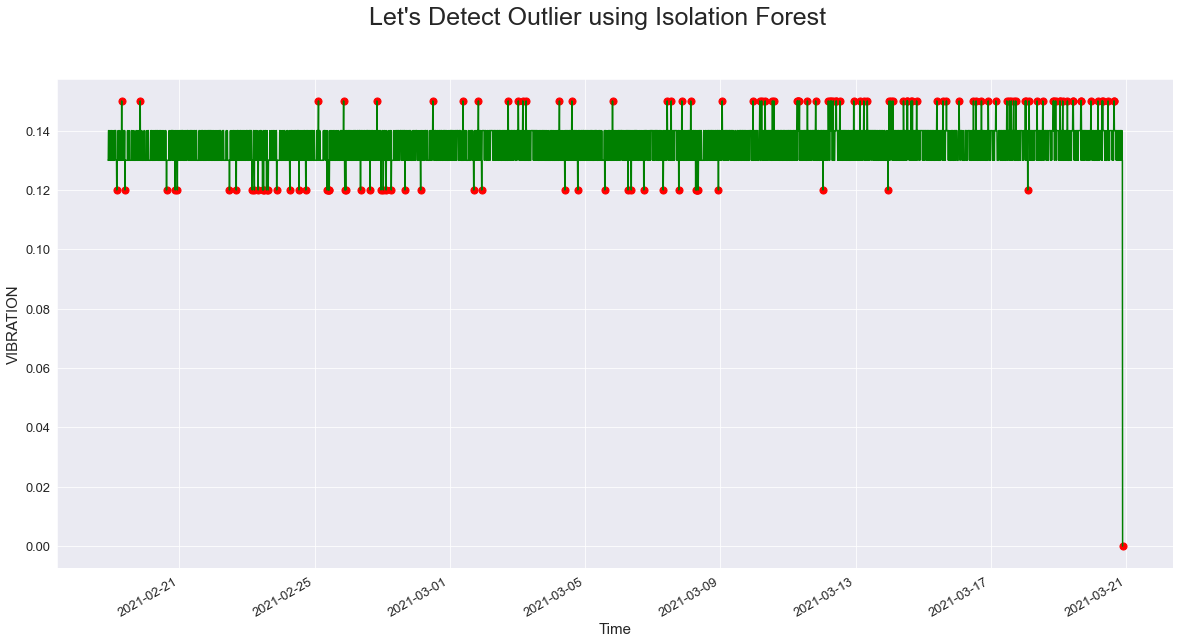

There are total 211 outliers in VIBRATION columns


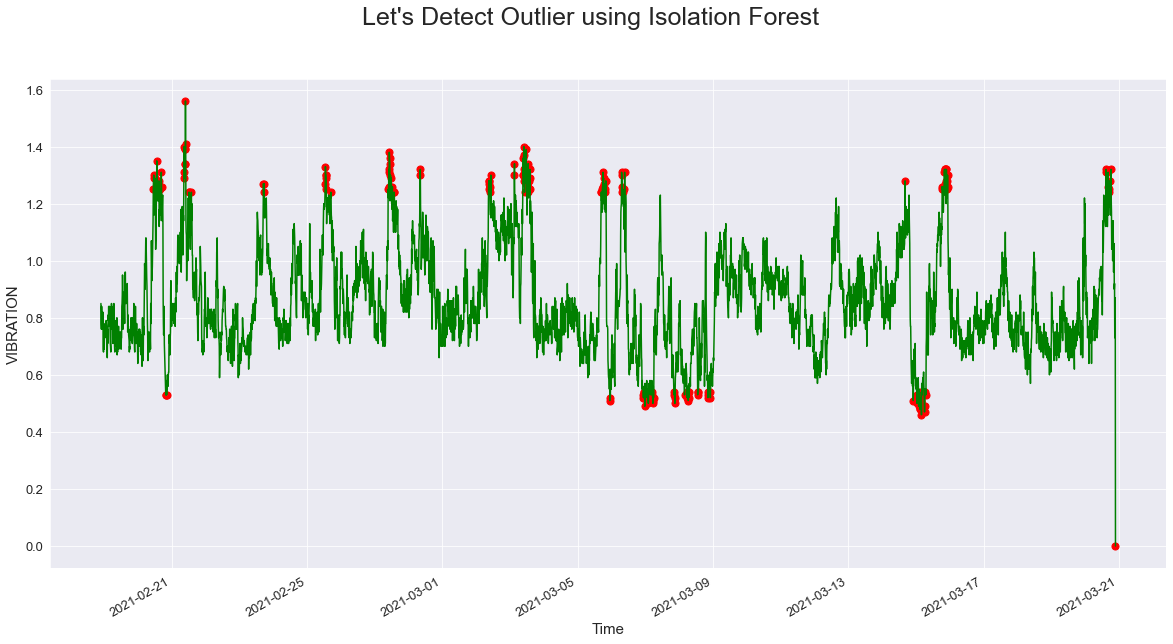

There are total 147 outliers in VIBRATION columns


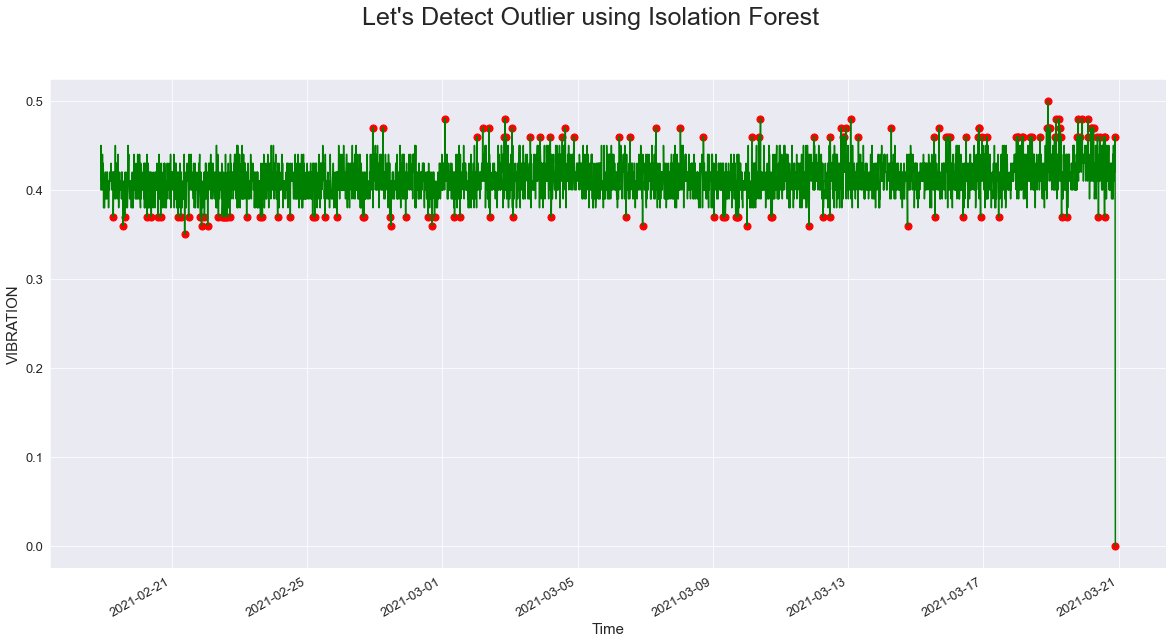

There are total 135 outliers in VIBRATION columns


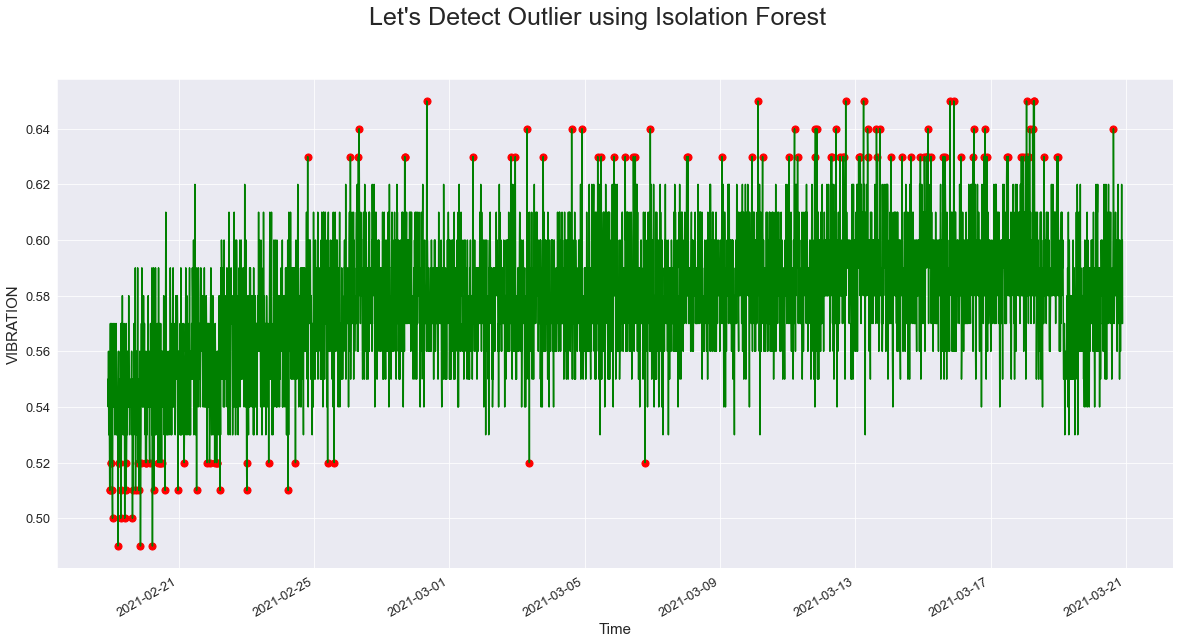

There are total 40 outliers in VIBRATION columns


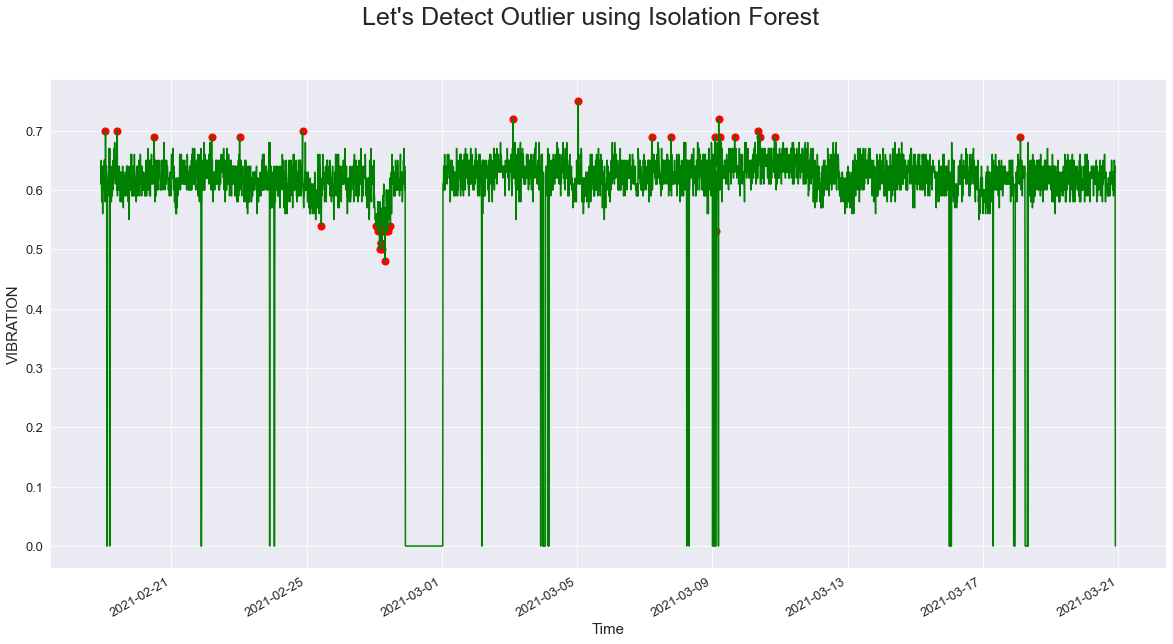

There are total 150 outliers in VIBRATION columns


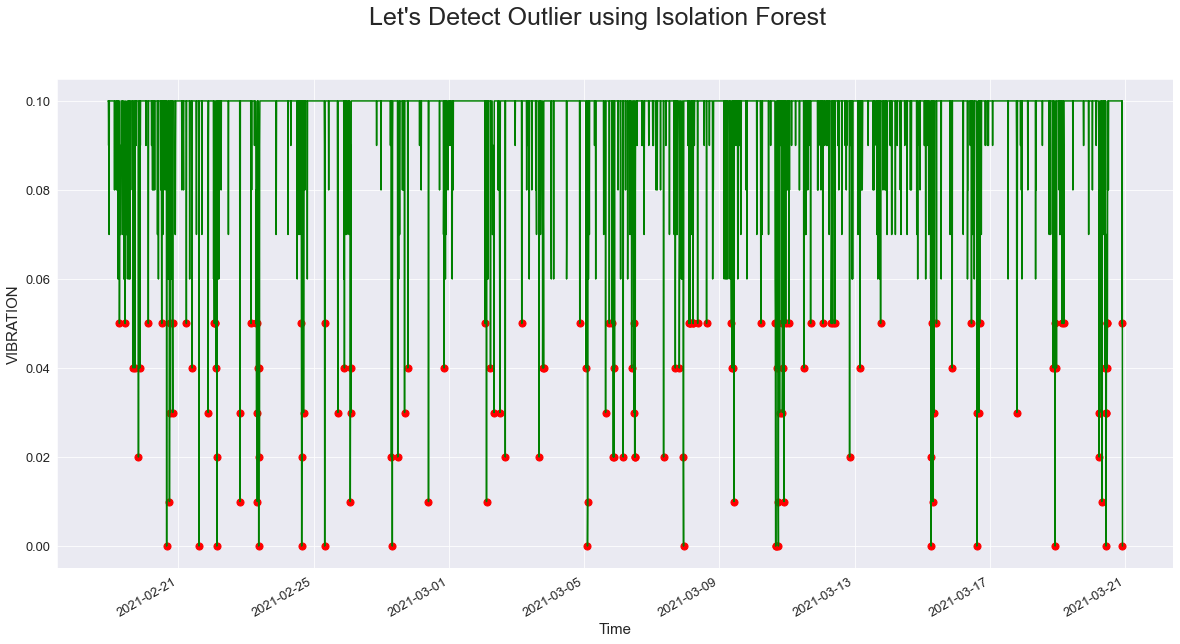

There are total 157 outliers in VIBRATION columns


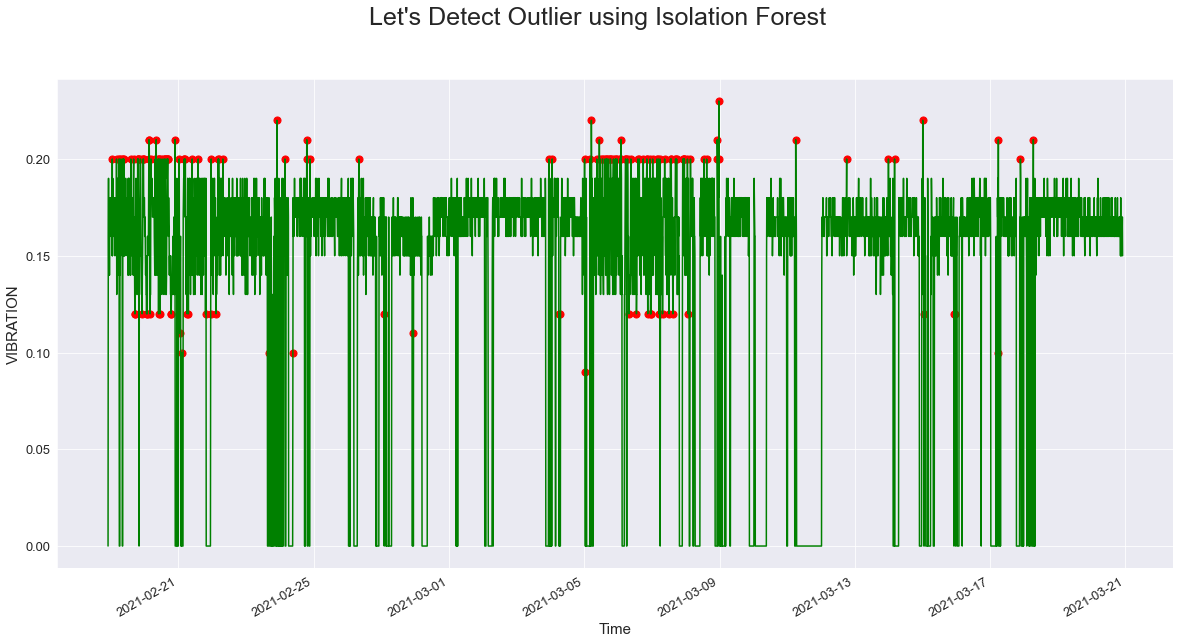

There are total 153 outliers in VIBRATION columns


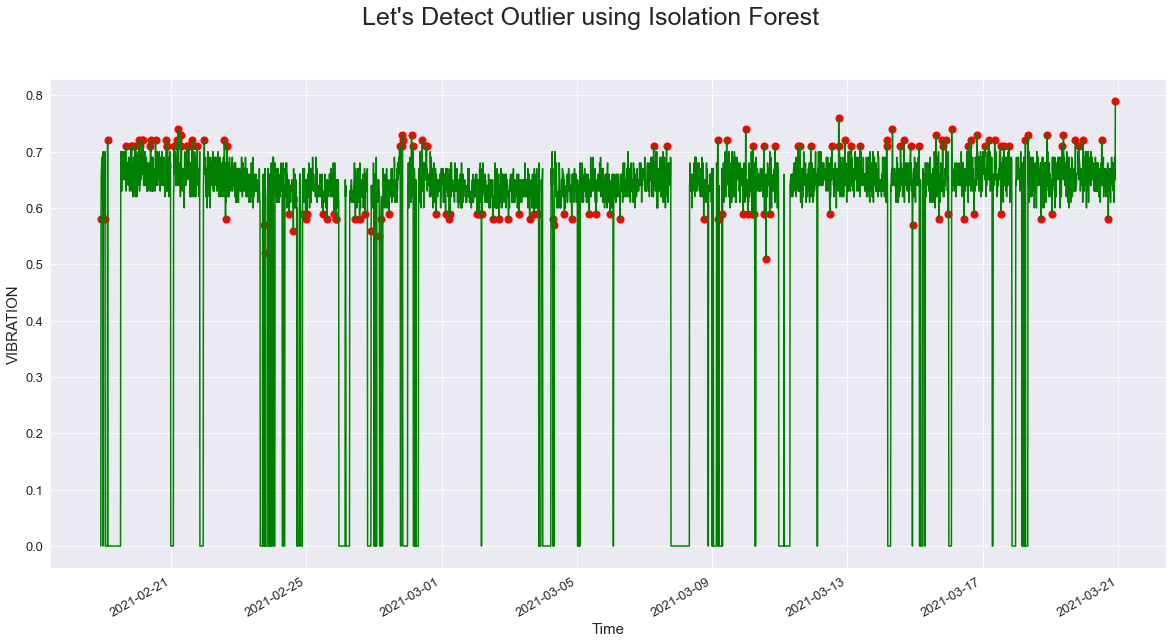

There are total 195 outliers in VIBRATION columns


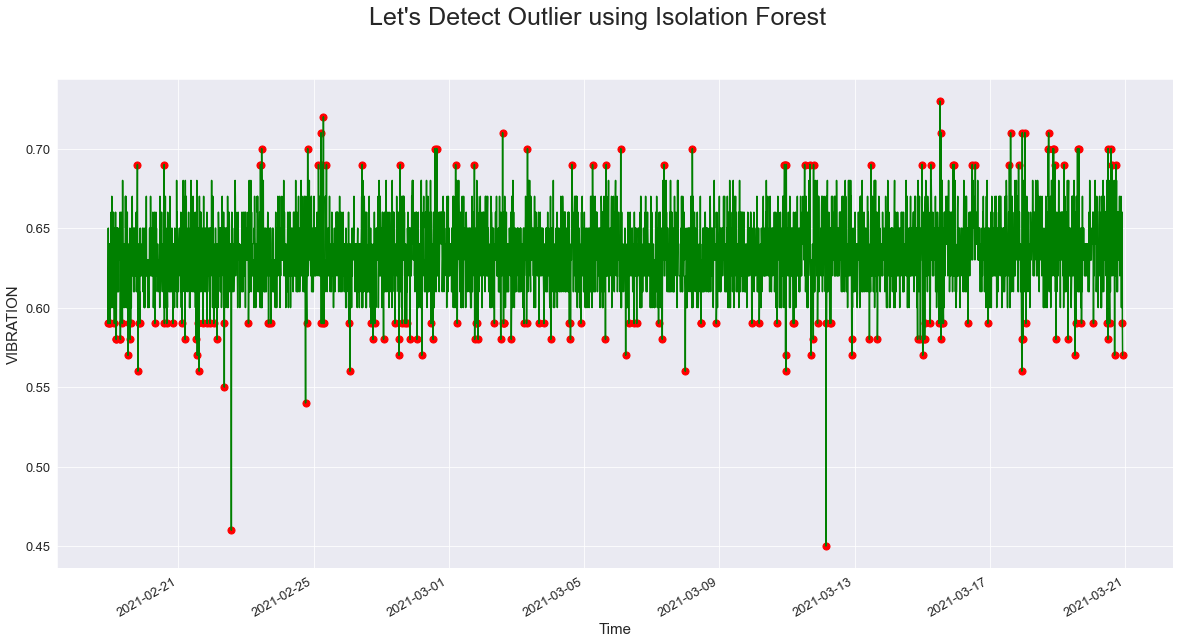

There are total 73 outliers in VIBRATION columns


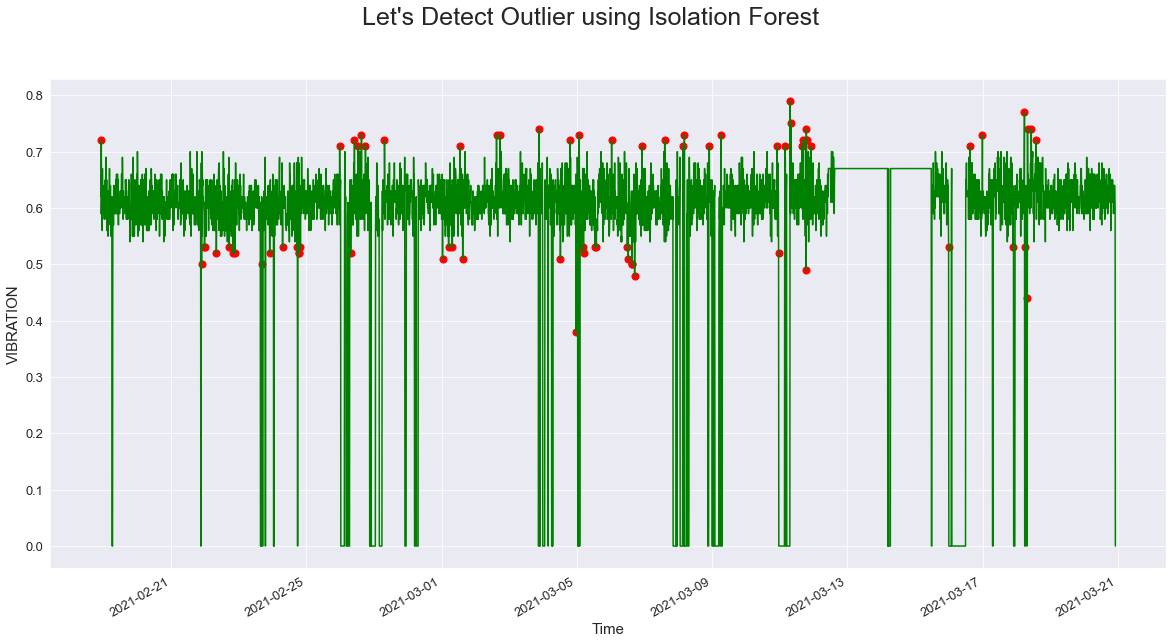

There are total 170 outliers in VIBRATION columns


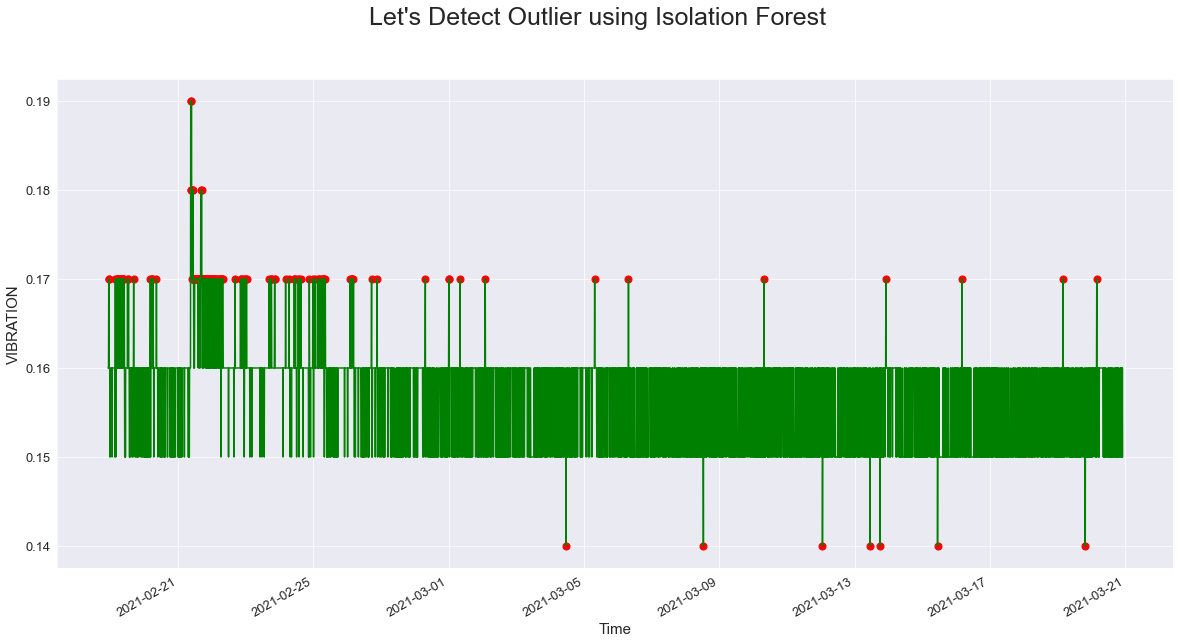

There are total 96 outliers in VIBRATION columns


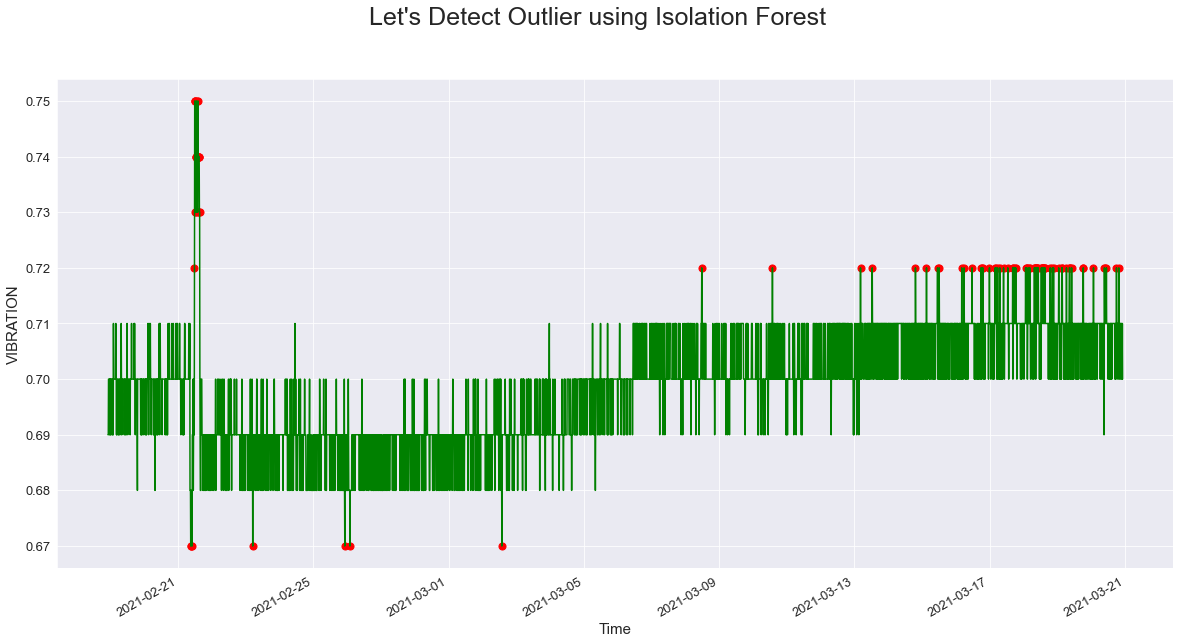

There are total 214 outliers in VIBRATION columns


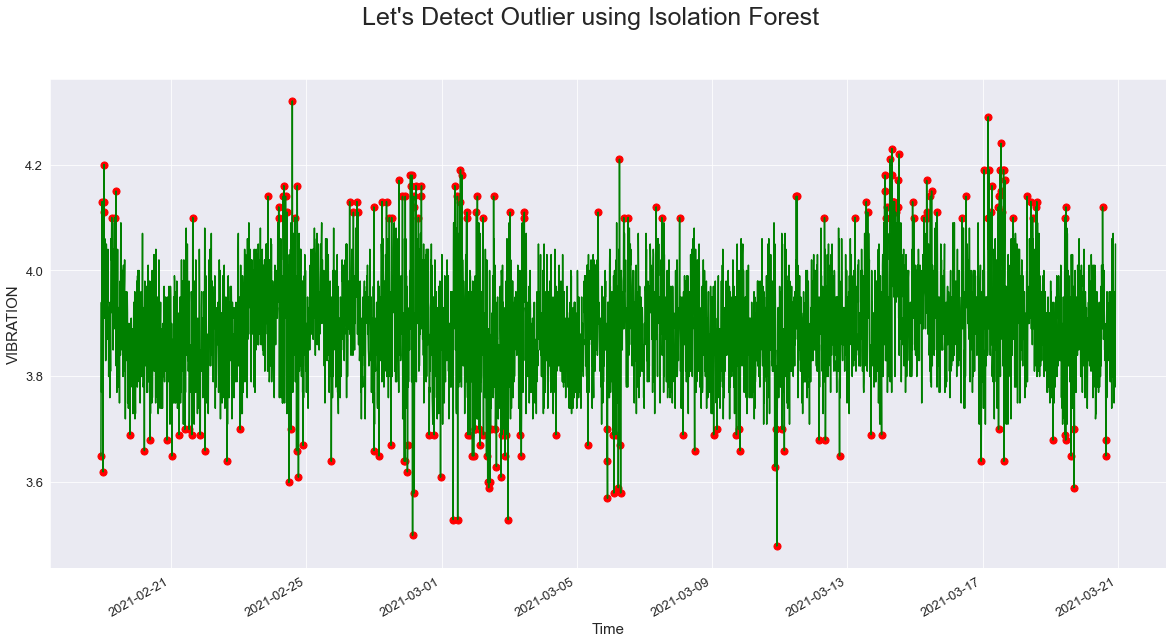

In [32]:
if __name__ == "__main__":

    for i in range(1,15):
        df=load_data(f"training/Well {i}.csv")
        df=preprocess_data(df)
#         plot_data(df)
        detect_outlier_usingIsolation_forest(df,i)